# Perpay Data Science Challenge

Welcome to the _Perpay Data Science Team_ technical challenge. This assignment is designed to assess two skills we find key to success on our team: applying machine learning within the constraints of a business context and applying machine learning to problems with non-obvious solutions. We also use this challenge to gauge a candidate's reasoning and communication skills.

Inside this notebook you will find a description of Perpay's Marketplace that provides the detail necessary to work with the data set included with this notebook. You will also find a set of modeling requirements. Your task is to use the data and the business context provided to build a model that satisfies these requirements.

# Business Context

Perpay offers two products to consumers that provide opportunities for _credit building_ and _credit access_. The first is the Perpay Marketplace, an E-commerce platform where members can purchase items through an installment loan, where they pay off the goods over time. The second is the Perpay Credit Card, which functions in many ways like a traditional credit card but with certain unique features designed to best serve our user base.

The data set in this challenge represents the payment status for a subset of loans from the Perpay Marketplace, as of May 9th, 2023. The chart below shows the volume of loans in this data set by their `Date of Repayment`, that is the day that the loan was created (this is sometimes referred to as origination in the lending industry).

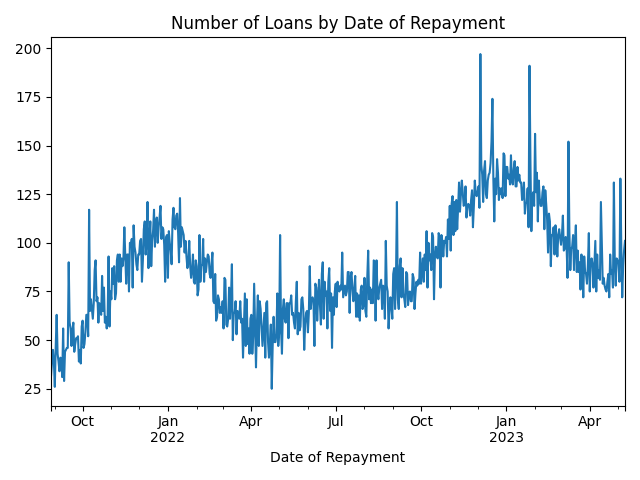


As a lending business, we are interested in how many of these loans will have their balance paid in full (Liquidation) or will have failed to do so within the duration of the loan (Default). Due to the nature of lending, there is a delay between when a loan enters repayment and reaches one of these states. _Understanding this effect is a key component to successfully address the questions below._

For example, consider the loans that entered repayment on March 1st, 2022

|            |   Number of Loans |   Default (as of 2023-05-09) |   Liquidation (as of 2023-05-09) |
|:-----------|------------------:|-----------------------------:|---------------------------------:|
| 2022-03-01 |                70 |                            4 |                               66 |

Of these loans, all 70 have "fully matured" - that is, all balances have either liquidated or defaulted, with the default and liquidation rates being 6% and 94% respectively. For this cohort, all outcomes are fully realized and there is nothing to forecast.

Contrast that with loans which entered repayment on February 1st, 2023. Of these loans, 41 had a liquidated balance and none had defaulted as of May 9th, 2023. We say that the balance of the 115 remaining loans is "active" or that these loans are "in-flight". As time moves on we will see the number of in-flight loans in this cohort with a status of `Default` or `Liquidation` increase.

|            |   Number of Loans |   Default (as of 2023-05-09) |   Liquidation (as of 2023-05-09) |
|:-----------|------------------:|-----------------------------:|---------------------------------:|
| 2023-02-01 |               156 |                            0 |                               41 |

This explains why both curves approach zero in the chart below as the date of repayment reaches the date the snapshot was collected.

<img src="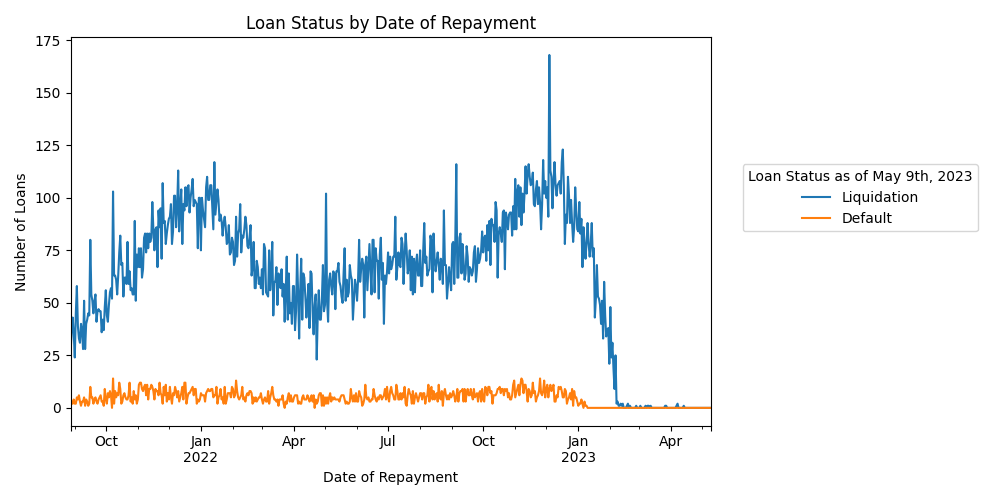
">

Forecasting the end state of in-flight loans is an essential task for understanding the financial health of our business and the ability of our product to help consumers build credit.

Additional definitions/properties that apply to all loans and may be useful in your analysis are below.

- All loans will eventually enter a status of `Default` or `Liquidation`. There are no other terminal states.
- `Default` occurs when a loan has been delinquent (past-due) for 120 days.
- `Liquidation` occurs when a loan has been paid in full.
- Each loan has a `duration`, that is a schedule of installments by which the borrower fulfills their obligation. For most loans in this data set, the duration is around 90 days from the date of repayment.
- Several factors may cause a loan to mature before or after its `duration`, including
    - Sometimes borrowers make payments above or below the amount due, thus shortening or lengthening the lifetime of the loan.
    - Extensions may be granted to borrowers experiencing hardship.
    - Loans may cycle between a past-due and current status one or more times. So long as payments are resumed before the 120 day mark the loan status will continue to move from past-due to current.


# Challenge Description

Your task is to build a model that predicts the `Default`/`Liquidation` rates _n_ days from May 9th, 2023, for any given _n_, using the data provided. As your final submission, you will be asked to provide predictions for specific values of _n_.

# Model Evaluation

Models are assessed across two categories.

## Application Within a Business Context

It's important that your final predictions are consistent with the business context described above: for example, predicted default rates should be 0 for all dates less than 120 days from repayment. To assess whether predictions satisfy these criteria, each submission is run through the `submission-validator.ipynb` notebook. This notebook is shared with each candidate and we encourage you to validate your own predictions before submitting your solution.

Keep in mind that a good model might still fail some of these constraints, however in this case you should provide some commentary justifying why this is so.

## Application With Non-Obvious Solution

This challenge is designed in such a way as to require you to think "outside the box". Ideally, your methodology will find a way to handle some of the unique features of this data set, e.g.

- The potential for mature default rates to change over time (with `Date of Repayment`). I.e. your model should be able to address whether default/liquidation rates are changing over time.
- The rate at which loans default or liquidate. I.e. your model should be able to explain how quickly loans reach a `Default` or `Liquidated` status. For the data provided, you can make the assumption that this rate does not change with `Date of Repayment`.
- The lack of mature labels for dates of repayment with in-flight loans. I.e. any trend effects in the model should not overfit to the censored nature of the data.
- The lack of features and a proper test set.

# Additional Evaluation Criteria

In addition to the model requirements above, each submission is also assessed according to the following criteria:

- **Logic**: Was the logic in their answer sound?
- **Assumptions**: Did they make any assumptions clear?
- **Code quality**: Is the code executable, functional, documented?
- **Efficiency**: Is the code concise and reasonably performant?
- **Technology used**: Are they using modern tools and libraries appropriately?
- **Communication**: Were answers clear and presented in a reasonable way?

We encourage you to add prose to your notebooks (e.g. comments or Markdown) with these categories in mind.

## Be yourself!

While the problem description and evaluation criteria are concrete there are many different ways to approach this problem and share your results. We encourage you to be yourself and put forward a solution that represents your own unique experience, skills, thought processes and communication style.

# Hints

Note that this challenge is designed such that "off the shelf" models (e.g. `sklearn` or `Prophet`) overfit and underperform a good heuristic. Thus to produce an acceptable solution you'll need to think outside the box. Also, about feature engineering: seasonality has no correlation on default/liquidation rates in this data set.

# Submission Format

Your submission will contain two files

1. A `jupyter` notebook that contains your modeling code (separate from this challenge description).
2. A csv with predictions in the following format.

| Date of Repayment   | Default (as of 2023-06-08)   | Liquidation (as of 2023-06-08)   | Default (as of 2023-07-08)   | Liquidation (as of 2023-07-08)   | Default (as of 2023-08-07)   | Liquidation (as of 2023-08-07)   | Default (fully mature)   | Liquidation (fully mature)   |
|:--------------------|:-----------------------------|:---------------------------------|:-----------------------------|:---------------------------------|:-----------------------------|:---------------------------------|:-------------------------|:-----------------------------|
| 2021-08-28          | ...                          | ...                              | ...                          | ...                              | ...                          | ...                              | ...                      | ...                          |
| ...                 | ...                          | ...                              | ...                          | ...                              | ...                          | ...                              | ...                      | ...                          |
| 2023-05-09          | ...                          | ...                              | ...                          | ...                              | ...                          | ...                              | ...                      | ...                          |

Keep in mind that you are free to use any code, libraries or methodologies in your solution, just add the following snippet to your notebook so we can reproduce your work

```python
%load_ext watermark
%watermark -v -iv
```